## OIDD 4770 Final Project Write Up Codes
## Title: Hotel Reservations/Bookings Code

## Author: Jerry Fang

## Algorithms used for report writeup:

In [1]:
# Import the packages 
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()
print("current working dir:", cwd)

# change current working directory
os.chdir('../FinalProject_JerryFang')
# Get the current working directory
cwd = os.getcwd()
print(cwd)


current working dir: /Users/jerryfang/Spring 2023/OIDD 4770/FinalProject_JerryFang
/Users/jerryfang/Spring 2023/OIDD 4770/FinalProject_JerryFang


## Links to dataset from Kaggle:

https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset



In [2]:
# Import the dataset
# Using pandas to read the Hotel Reservations csv file
hotel_reservations = pd.read_csv('HotelReservations.csv')

In [3]:
# Prints the first five rows
print(hotel_reservations.head(5))

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [4]:
# Obtaining info of dataset
hotel_reservations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

## Explanation of the variables in dataset:

Booking_ID: unique identifier of each booking

no_of_adults: Number of adults

no_of_children: Number of Children

no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest  booked 

no_of_week_nights: Number of week nights (Monday to Friday) the guest  booked 

type_of_meal_plan: Type of meal plan included in the booking

required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)

room_type_reserved: Type of room reserved by the customer. 

lead_time: Number of days before the arrival date the booking was made

arrival_year: Year of arrival 

arrival_month: Month of arrival 

arrival_date: Date of month for arrival

market_segment_type: How the booking was made

repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking

no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

avg_price_per_room: Average price per day of the reservation. 

no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

booking_status: Whether the booking was cancelled or not

In [5]:
# Providing the summary statistics of the variables of hotel reservations
hotel_reservations.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [6]:
# Drops the Booking ID column. 
hotel_reservations.drop(['Booking_ID'], 
                        axis=1)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [7]:
print('columns:', 
      hotel_reservations.columns)
print('number of columns: ', 
      hotel_reservations.shape[1])

columns: Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')
number of columns:  19


In [8]:
# drop rows where at least one element is missing
import numpy as np
hotel_reservations_drop_emptyrow = hotel_reservations.dropna()
print(hotel_reservations_drop_emptyrow.head(5))

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [9]:
print('number of rows', hotel_reservations.shape[0])
print('number of rows after removing emptyrow', 
      hotel_reservations_drop_emptyrow.shape[0])
print('number of empty rows removed:', 
      hotel_reservations.shape[0]-
      hotel_reservations_drop_emptyrow.shape[0])




number of rows 36275
number of rows after removing emptyrow 36275
number of empty rows removed: 0


In [10]:
hotel_reservations_drop_emptyrow.index

RangeIndex(start=0, stop=36275, step=1)

In [11]:
# Use data slicing to obtain the subset of the Dataframe
# Use double brackets so we get a DF as output
# 
hotel_reservations_drop_emptyrow.index
hotel_reservations_1 = hotel_reservations_drop_emptyrow[["no_of_children", 
                                                "no_of_special_requests", 
                                                "booking_status"]]
print(hotel_reservations_1.head(5))

   no_of_children  no_of_special_requests booking_status
0               0                       0   Not_Canceled
1               0                       1   Not_Canceled
2               0                       0       Canceled
3               0                       0       Canceled
4               0                       0       Canceled


In [12]:
# data slicing by year, find 2018
hotel_reservations_2018 = hotel_reservations_drop_emptyrow[
    hotel_reservations_drop_emptyrow.arrival_year==2018]
print(hotel_reservations_2018.head(5))

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
1        Room_Type 1          5          2018             11             6   
2        Room_

In [13]:
# use groupby method to group by roomtype
hotel_reservations_roomtype_1 = hotel_reservations_drop_emptyrow.groupby(
    'room_type_reserved').get_group("Room_Type 1")
print(hotel_reservations_roomtype_1.head(5))
hotel_reservations_roomtype_2 = hotel_reservations_drop_emptyrow.groupby(
    'room_type_reserved').get_group("Room_Type 2")
print(hotel_reservations_roomtype_2.head(5))
hotel_reservations_Online = hotel_reservations_drop_emptyrow.groupby(
    'market_segment_type').get_group("Online")
print(hotel_reservations_roomtype_2.head(5))

  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
0   INN00001             2               0                     1   
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
0                  2       Meal Plan 1                           0   
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
0        Room_Type 1        224          2017             10             2   
1        Room_

In [14]:
def get_average_price(hotel_reservation_drop_emptyrow, 
                      roomtype):
    hotel_reservation_roomtype = hotel_reservation_drop_emptyrow.groupby(
        'room_type_reserved').get_group(roomtype)
    

In [15]:
# Data Visualization using Matplotlib and Seaborn

In [16]:
#scatterplot
hotel_reservations_cancellation_vs_history = hotel_reservations_drop_emptyrow[
    ['no_of_previous_cancellations']]
booking_status = hotel_reservations_drop_emptyrow[
    'booking_status']

# Import LabelEncoder
from sklearn import preprocessing
import numpy as np
# Create LabelEncoder
le = preprocessing.LabelEncoder()
print(booking_status[:5])
booking_status_encoded=le.fit_transform(booking_status)
print(booking_status_encoded[:5])

df = pd.DataFrame({'no_of_previous_cancellations':
                   hotel_reservations_drop_emptyrow[
                       'no_of_previous_cancellations'],
                   'no_of_previous_bookings_not_canceled':
                   hotel_reservations_drop_emptyrow[
                       'no_of_previous_bookings_not_canceled'],
                  'booking_status_encoded':
                   booking_status_encoded})
print(df[:5])



0    Not_Canceled
1    Not_Canceled
2        Canceled
3        Canceled
4        Canceled
Name: booking_status, dtype: object
[1 1 0 0 0]
   no_of_previous_cancellations  no_of_previous_bookings_not_canceled  \
0                             0                                     0   
1                             0                                     0   
2                             0                                     0   
3                             0                                     0   
4                             0                                     0   

   booking_status_encoded  
0                       1  
1                       1  
2                       0  
3                       0  
4                       0  


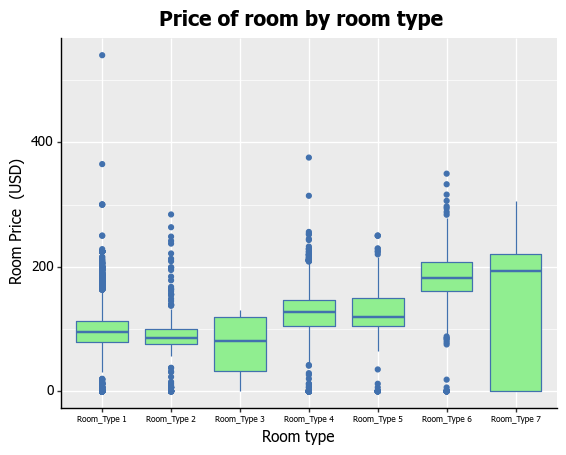

<ggplot: (343873271)>

In [17]:
# Boxplot of the price of room by room type
import pandas as pd
import numpy as np

import plotnine

from plotnine import *
from plotnine import data
from pandas import DataFrame

p1=(ggplot(hotel_reservations_drop_emptyrow, 
           aes("room_type_reserved", 
                "avg_price_per_room"))
        +geom_boxplot(colour="#4271AE", 
                      fill="lightgreen")
        +xlab("Room type ")
        +ylab("Room Price  (USD)")
    
       + ggtitle("Price of room by room type") 
       + theme(axis_line=element_line(size=1, 
                                       colour="black"),  
               plot_title=element_text(size=15, 
                                       family="Tahoma", 
                                       face="bold"), 
               text=element_text(family="Tahoma", 
                                 size=11), 
               axis_text_x=element_text(colour="black", 
                                        size=6), 
               axis_text_y=element_text(colour="black", 
                                        size=10),
              ))
p1

/Users/jerryfang/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


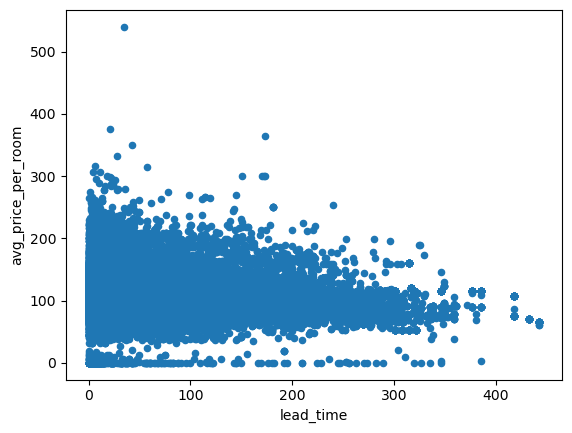

In [18]:
from plotnine import *
hotel_reservations_drop_emptyrow.plot.scatter(x=
                                              'lead_time', 
                                              y=
                                              'avg_price_per_room')
plt.show()

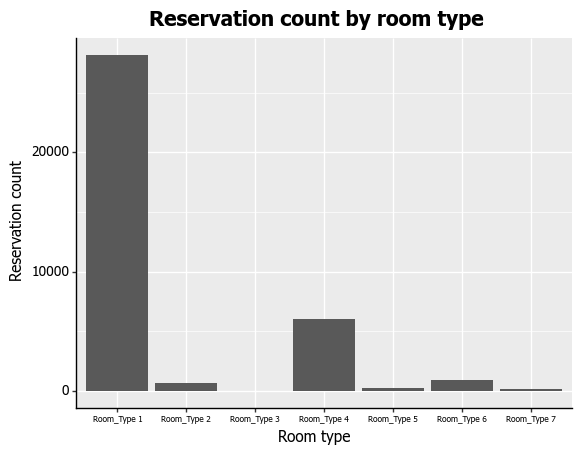

<ggplot: (352467547)>

In [19]:
# Bar plot to show reservation count and room type
from plotnine import *
import pandas as pd
import numpy as np

p2=(ggplot()+geom_bar(hotel_reservations_drop_emptyrow, 
                      aes(x='room_type_reserved'), 
                      size=20)
        +xlab("Room type ")
        +ylab("Reservation count")
    
       + ggtitle("Reservation count by room type") 
       + theme( axis_line=element_line(size=1, 
                                       colour="black"), 
               plot_title=element_text(size=15, 
                                       family="Tahoma", 
                                       face="bold"), 
               text=element_text(family="Tahoma", 
                                 size=11), 
               axis_text_x=element_text(colour="black", 
                                        size=6), 
               axis_text_y=element_text(colour="black",
                                        size=10),
              ))
p2

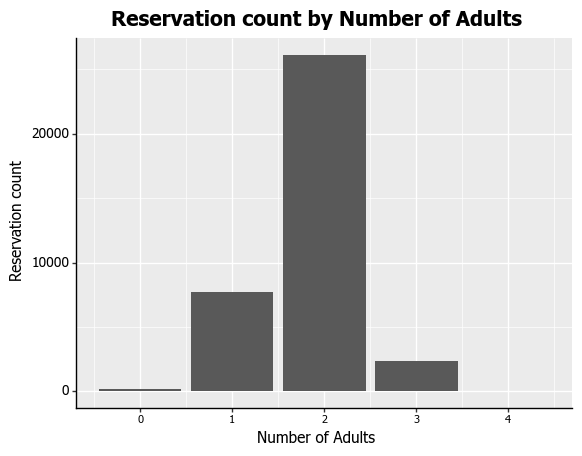

<ggplot: (352507492)>

In [20]:
# Bar plot to show reservation count and number of adults
from plotnine import *
import pandas as pd
import numpy as np

p3=(ggplot()+geom_bar(hotel_reservations_drop_emptyrow, 
                      aes(x='no_of_adults'), 
                      size=20)
        +xlab("Number of Adults")
        +ylab("Reservation count")
    
       + ggtitle("Reservation count by Number of Adults") 
       + theme( axis_line=element_line(size=1, 
                                       colour="black"), 
               plot_title=element_text(size=15, 
                                       family="Tahoma", 
                                       face="bold"), 
               text=element_text(family="Tahoma", 
                                 size=11), 
               axis_text_x=element_text(colour="black", 
                                        size=8), 
               axis_text_y=element_text(colour="black", 
                                        size=10),
              ))
p3

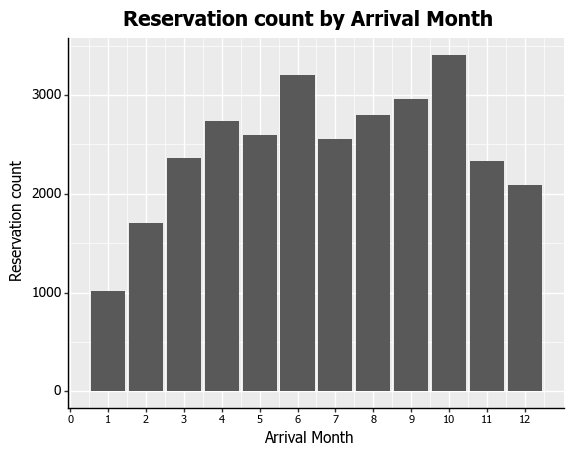

<ggplot: (352547825)>

In [21]:
# Bar plot to show reservation count and arrival month
p7=(ggplot()+geom_bar(hotel_reservations_2018, 
                      aes(x='arrival_month'), 
                      size=20)
        +xlab("Arrival Month")
        +ylab("Reservation count")
    +scale_x_continuous(breaks = np.arange(0, 13, 1))
       + ggtitle("Reservation count by Arrival Month") 
       + theme( axis_line=element_line(size=1, 
                                       colour="black"), 
               plot_title=element_text(size=15, 
                                       family="Tahoma", 
                                       face="bold"), 
               text=element_text(family="Tahoma", 
                                 size=11), 
               axis_text_x=element_text(colour="black", 
                                        size=8), 
               axis_text_y=element_text(colour="black", 
                                        size=10),
              ))
p7

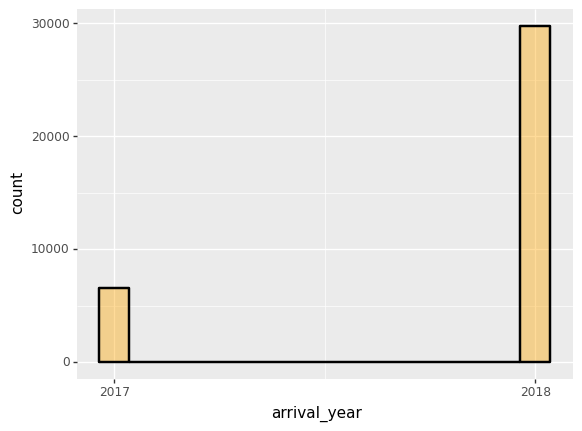

<ggplot: (352599239)>

In [22]:
# Histogram represents the total number of reservations in 2017 and 2018
p13 = (ggplot(hotel_reservations_drop_emptyrow,aes(x='arrival_year'))+
       geom_histogram(alpha=0.4,
                      size=1,
                      bins=15, 
                      color='black',
                      fill='orange'))+scale_x_continuous(breaks = 
                                                         np.arange(2017, 
                                                                    2019, 
                                                                    1))
p13

In [23]:
#Data processing
#encoding booking status

# Import LabelEncoder
from sklearn import preprocessing
import numpy as np
#creating LabelEncoder
le = preprocessing.LabelEncoder()

# Converting string labels into numbers.
booking_status = hotel_reservations_drop_emptyrow[
    'booking_status']
print(booking_status[:5])
booking_status_encoded=le.fit_transform(
    booking_status)
print(booking_status_encoded[:5])

type_of_meal_plan = hotel_reservations_drop_emptyrow[
    'type_of_meal_plan']
print(type_of_meal_plan[:6])
type_of_meal_plan_encoded=le.fit_transform(
    type_of_meal_plan)
print(type_of_meal_plan_encoded[:6])

market_segment_type = hotel_reservations_drop_emptyrow[
    'market_segment_type']
print(market_segment_type[:5])
market_segment_type_encoded=le.fit_transform(
    market_segment_type)
print(market_segment_type_encoded[:5])

room_type_reserved = hotel_reservations_drop_emptyrow[
    'room_type_reserved']
print(room_type_reserved[:5])
room_type_reserved_encoded=le.fit_transform(
    room_type_reserved)
print(room_type_reserved_encoded[:5])


0    Not_Canceled
1    Not_Canceled
2        Canceled
3        Canceled
4        Canceled
Name: booking_status, dtype: object
[1 1 0 0 0]
0     Meal Plan 1
1    Not Selected
2     Meal Plan 1
3     Meal Plan 1
4    Not Selected
5     Meal Plan 2
Name: type_of_meal_plan, dtype: object
[0 3 0 0 3 1]
0    Offline
1     Online
2     Online
3     Online
4     Online
Name: market_segment_type, dtype: object
[3 4 4 4 4]
0    Room_Type 1
1    Room_Type 1
2    Room_Type 1
3    Room_Type 1
4    Room_Type 1
Name: room_type_reserved, dtype: object
[0 0 0 0 0]


In [24]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# 70% training and 30% test
# pick a few features
hotel_reservations_subset1 = hotel_reservations_drop_emptyrow[['no_of_adults', 
                                                'no_of_children', 
                                                'no_of_weekend_nights',
                                                'no_of_week_nights', 
                                                'required_car_parking_space', 
                                                'avg_price_per_room', 
                                                'no_of_special_requests']]
hotel_reservations_subset1 = pd.DataFrame(
    {'no_of_adults':hotel_reservations_drop_emptyrow[
        'no_of_adults'],
     'no_of_children':hotel_reservations_drop_emptyrow[
         'no_of_children'],
     'no_of_weekend_nights':hotel_reservations_drop_emptyrow[
         'no_of_weekend_nights'],
     'no_of_week_nights':hotel_reservations_drop_emptyrow[
         'no_of_week_nights'],
     'lead_time':hotel_reservations_drop_emptyrow[
         'lead_time'],
     'avg_price_per_room':hotel_reservations_drop_emptyrow[
         'avg_price_per_room'],
     'no_of_special_requests':hotel_reservations_drop_emptyrow[
         'no_of_special_requests'],
     'type_of_meal_plan_encoded':type_of_meal_plan_encoded,
     'market_segment_type_encoded':market_segment_type_encoded,
     'room_type_reserved_encoded':room_type_reserved_encoded,
    })
print(hotel_reservations_subset1[0:5])

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             2               0                     1                  1   

   lead_time  avg_price_per_room  no_of_special_requests  \
0        224               65.00                       0   
1          5              106.68                       1   
2          1               60.00                       0   
3        211              100.00                       0   
4         48               94.50                       0   

   type_of_meal_plan_encoded  market_segment_type_encoded  \
0                          0                            3   
1                          3                            4   

In [25]:
hotel_reservations_subset1.shape

(36275, 10)

In [26]:
import time 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    hotel_reservations_subset1, 
    booking_status_encoded, 
    test_size=0.3,
    random_state=109)

print(X_train[:5])
print(y_train[:5])

# Naive Bayes with multiple labels
# Model Generation
# Evaluating Model

# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB 
t1 = time.time()
# Create a Gaussian Classifier
gnb = GaussianNB() 
# Train model using the training sets
gnb.fit(X_train, y_train) 
# Predict the response for test dataset
y_pred = gnb.predict(X_test) 
from sklearn import metrics 
# Model. Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, 
                                         y_pred)) 
t2 = time.time()
elapser = t2-t1
print(elapser, 'seconds')




       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
18568             2               0                     2                  1   
34952             1               0                     0                  1   
24519             2               0                     2                  3   
33736             2               0                     2                  3   
18245             2               0                     2                  2   

       lead_time  avg_price_per_room  no_of_special_requests  \
18568        197               82.50                       0   
34952          5              105.00                       0   
24519          4              162.00                       0   
33736         34               94.30                       0   
18245        238               95.63                       2   

       type_of_meal_plan_encoded  market_segment_type_encoded  \
18568                          3                            4   
3495

In [27]:
import time
from sklearn.model_selection import train_test_split

hotel_reservations_subset2 = pd.DataFrame(
    {'no_of_adults':hotel_reservations_drop_emptyrow[
        'no_of_adults'],
     'no_of_children':hotel_reservations_drop_emptyrow[
         'no_of_children'],
     'no_of_weekend_nights':hotel_reservations_drop_emptyrow[
         'no_of_weekend_nights'],
     'no_of_week_nights':hotel_reservations_drop_emptyrow[
         'no_of_week_nights'],
     'no_of_special_requests':hotel_reservations_drop_emptyrow[
         'no_of_special_requests'],
    })

X_train, X_test, y_train, y_test = train_test_split(
    hotel_reservations_subset2, 
    booking_status_encoded, 
    test_size=0.3,
    random_state=109)
print(X_train[:5])
print(y_train[:5])
# Naive Bayes with multiple labels
# Model Generation
# Evaluating Model

# Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB 
t1 = time.time()
# Create a Gaussian Classifier
gnb = GaussianNB() 
# Train the model using the training sets
gnb.fit(X_train, y_train) 
# Predict the response for test dataset
y_pred = gnb.predict(X_test) 
from sklearn import metrics 
# Model. Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, 
                                         y_pred)) 
t2 = time.time()
elapser = t2-t1 
print(elapser, 'seconds')

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
18568             2               0                     2                  1   
34952             1               0                     0                  1   
24519             2               0                     2                  3   
33736             2               0                     2                  3   
18245             2               0                     2                  2   

       no_of_special_requests  
18568                       0  
34952                       0  
24519                       0  
33736                       0  
18245                       2  
[0 1 1 1 1]
Accuracy: 0.676284112836534
0.006638050079345703 seconds


In [28]:
# Import warnings filter
import time
from warnings import simplefilter
# Ignore all future warnings
simplefilter(action='ignore',
             category=FutureWarning)

# K-Nearest Neighbor (KNN) classifier - 
# supervised machine learning model
from sklearn.model_selection import train_test_split

t1 = time.time()
X=hotel_reservations_subset1
y= booking_status_encoded
X_train, X_test, y_train, y_test = train_test_split(
    hotel_reservations_subset1, 
    booking_status_encoded, 
    test_size=0.2,
    random_state=101, 
    stratify=y)

#Building and training the model
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
# From scipy import stats
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train) 
# Testing the model
# Show first 5 model predictions on the test data
knn.predict(X_test)[0:5]
# Check accuracy of our model on the test data
print(knn.score(X_test, y_test)) 
t2 = time.time()
elapser = t2-t1 ##in ns
print(elapser, 'seconds')

0.8146106133700896
0.19749021530151367 seconds


In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np
# Create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=3)
# Train model with cv of 5
cv_scores = cross_val_score(knn_cv, X, y, cv=3)
# Print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores))) 

[0.81012239 0.80664902 0.80555785]
cv_scores mean:0.8074430906895178


In [30]:
# Import warnings filter
from warnings import simplefilter
# Ignore all future warnings
simplefilter(action='ignore', 
             category=FutureWarning)

t1 = time.time()
# Hypertuning model parameters
from sklearn.model_selection import GridSearchCV
# Create new a knn model
knn2 = KNeighborsClassifier()
# Create a dictionary of all values we want 
# to test for n_neighbors
param_grid = {"n_neighbors": np.arange(1, 25)}
# Use gridsearch to test all values 
# for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
# Fit model to data
knn_gscv.fit(X, y)
# Check top performing n_neighbors value 
print(knn_gscv.best_params_)
# Checks the mean score for the top performing 
# value of n_neighbors
print('best-score: ', knn_gscv.best_score_)
t2 = time.time()
elapser = t2-t1 
print(elapser, 'seconds')

{'n_neighbors': 1}
best-score:  0.8183873190902826
13.176709175109863 seconds


In [31]:
# Model building
# Builds a cancellation prediction model: 
# predicts if the guest 
# will cancel using the logistic 
# regression classifier
# Features include every column 
# except the booking status

X = pd.DataFrame(
    {'no_of_adults':hotel_reservations_drop_emptyrow[
        'no_of_adults'],
    'no_of_children':hotel_reservations_drop_emptyrow[
         'no_of_children'],
    'no_of_weekend_nights':hotel_reservations_drop_emptyrow[
         'no_of_weekend_nights'],
    'no_of_week_nights':hotel_reservations_drop_emptyrow[
         'no_of_week_nights'],
    'lead_time':hotel_reservations_drop_emptyrow[
         'lead_time'],
    'avg_price_per_room':hotel_reservations_drop_emptyrow[
         'avg_price_per_room'],
    'no_of_special_requests':hotel_reservations_drop_emptyrow[
         'no_of_special_requests'],
    'type_of_meal_plan_encoded':type_of_meal_plan_encoded,
    'market_segment_type_encoded':market_segment_type_encoded,
    'room_type_reserved_encoded':room_type_reserved_encoded,
    })
y=booking_status_encoded

t1 = time.time()
# Splits X and y into training and testing sets
# It means 70% data will be used 
# for model training 
# and 30% for model testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,
                                            test_size=0.3,
                                            random_state=0)

# Imports the class
from sklearn.linear_model import LogisticRegression 
# Instantiates the model (using the 
# default parameters)
logreg = LogisticRegression()

# Fits the model with data
logreg.fit(X_train,y_train) 

y_pred=logreg.predict(X_test)
print(y_pred[0:5])

# Model Evaluation using Confusion Matrix
# Imports the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, 
                                    y_pred)
cnf_matrix
t2 = time.time()
elapser = t2-t1 ##in ns
print(elapser, 'seconds')



[1 1 0 1 1]
0.18102288246154785 seconds


/Users/jerryfang/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.06084012985229492 seconds


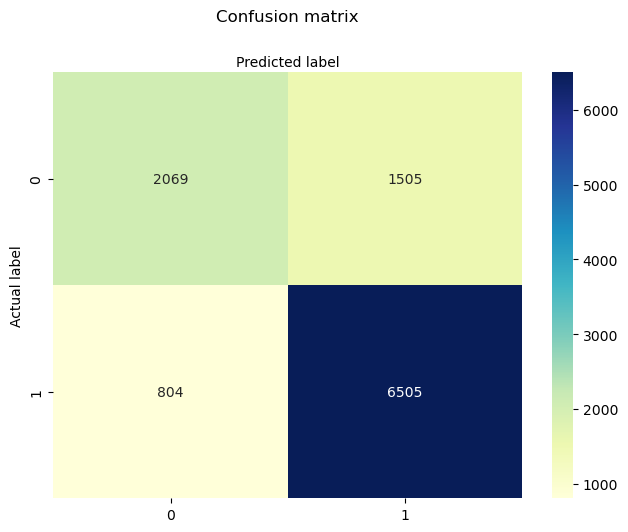

In [32]:
# 2059 and 6514 are actual predictions and 
# 1515 and 795 are incorrect predictions
# 0: canceled, 1: not canceled
# Name: booking_status
# 0    Not_Canceled 1
# 1    Not_Canceled 1
# 2        Canceled 0
# 3        Canceled 0
# 4        Canceled 0
# Name: booking_status, dtype: object
# [1 1 0 0 0]
# Confusion matrix
# Visualizing Confusion Matrix using the Heatmap

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


t1 = time.time()
class_names=(0,1)
# Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# Creates heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), 
            annot=True, 
            cmap="YlGnBu",
            fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', 
          y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
t2 = time.time()
elapser = t2-t1
print(elapser, 'seconds')


In [33]:
# Precision and recall
# Evaluates the model using model evaluation metrics such as accuracy, 
# precision, and recall.
# Accuracy provides us with an insight of how often the classifier is correct. 
# Precision is about being precise, i.e., how accurate your model is. 
# In other words, when a model makes a prediction, how often it is correct. 
# Recall is the ability of a model to find all the relevant cases 
# within a data set. 

print ("Accuracy:", metrics.accuracy_score(y_test, 
                                           y_pred))
print("Precision:", metrics.precision_score(y_test, 
                                            y_pred))
print("Recall:", metrics.recall_score(y_test, 
                                      y_pred))



Accuracy: 0.7878342368832123
Precision: 0.8121098626716604
Recall: 0.8899986318237789


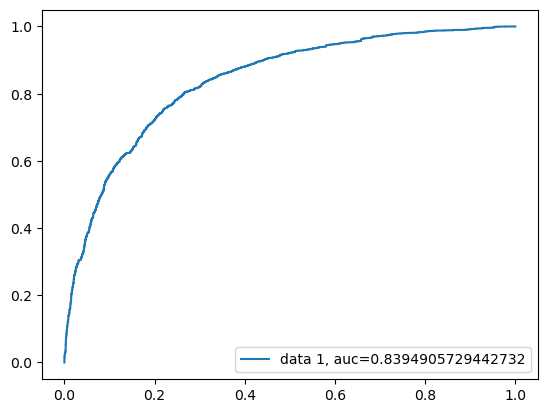

In [34]:
# ROC Curve
# Receiver Operating Characteristic (ROC) curve 
# is a plot of the true positive rate
# against the false positive rate. 
# It shows the tradeoff between sensitivity and specificity.
# AUC score - AUC score 1 represents a perfect 
# classifier, and 0.5
# represents a worthless classifier.
y_pred_proba=logreg.predict_proba(X_test)[::,1]
fpr, tpr, _=metrics.roc_curve(y_test, 
                              y_pred_proba)
auc=metrics.roc_auc_score(y_test, 
                          y_pred_proba)
plt.plot(fpr, tpr, 
         label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()


In [35]:
# Imports train_test_split function
from sklearn.model_selection import train_test_split 
# Splits dataset into training set and test set
# 70% training and 30% test
X = pd.DataFrame(
    {'no_of_adults':hotel_reservations_drop_emptyrow[
        'no_of_adults'],
    'no_of_children':hotel_reservations_drop_emptyrow[
         'no_of_children'],
    'no_of_weekend_nights':hotel_reservations_drop_emptyrow[
         'no_of_weekend_nights'],
    'no_of_week_nights':hotel_reservations_drop_emptyrow[
         'no_of_week_nights'],
    'lead_time':hotel_reservations_drop_emptyrow[
         'lead_time'],
    'avg_price_per_room':hotel_reservations_drop_emptyrow[
         'avg_price_per_room'],
    'no_of_special_requests':hotel_reservations_drop_emptyrow[
         'no_of_special_requests'],
    'type_of_meal_plan_encoded':type_of_meal_plan_encoded,
    'market_segment_type_encoded':market_segment_type_encoded,
    'room_type_reserved_encoded':room_type_reserved_encoded,
    })
y=booking_status_encoded
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                            test_size=0.3,
                                            random_state=101) 
print("train test splitted")

train test splitted


In [36]:
print(X[0:2])
print(y[0:20])

   no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   

   lead_time  avg_price_per_room  no_of_special_requests  \
0        224               65.00                       0   
1          5              106.68                       1   

   type_of_meal_plan_encoded  market_segment_type_encoded  \
0                          0                            3   
1                          3                            4   

   room_type_reserved_encoded  
0                           0  
1                           0  
[1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1]


In [37]:
print("Use svm model to train and predict")
# Imports svm model
from sklearn import svm 

t1 = time.time()
# Creates a svm Classifier
clf = svm.SVC(
    kernel='linear') # Linear Kernel 
# Trains the model using the training sets
clf.fit(X_train, 
        y_train) 
print("Train finish")
# Predicts the response for test dataset
y_pred = clf.predict(X_test)

print("predict finish")

# Imports scikit-learn metrics 
# module for accuracy calculation
from sklearn import metrics 
# Model Accuracy: how often 
# is the classifier correct?
print("Accuracy:",
      metrics.accuracy_score(y_test, 
                             y_pred))
# Model Precision: what percentage of 
# positive tuples are labeled as such?
print("Precision:",
      metrics.precision_score(y_test, 
                              y_pred))
# Model Recall: what percentage of positive 
# tuples are labelled as such?
print("Recall:",
      metrics.recall_score(y_test, 
                           y_pred)) 
t2 = time.time()
elapser = t2-t1
print(elapser, 'seconds')


Use svm model to train and predict
Train finish
predict finish
Accuracy: 0.7995956997151521
Precision: 0.8259776185087389
Recall: 0.8918001629106707
497.58747482299805 seconds


In [38]:
# Linear Regression
from sklearn.linear_model import LinearRegression

t1 = time.time()
regressor = LinearRegression()
regressor.fit(X_train, y_train) 
# To retrieve the intercept and slope:
print(regressor.intercept_)
print(regressor.coef_)

y_pred = regressor.predict(X_test) 
df = pd.DataFrame({'Actual': y_test, 
                   'Predicted': y_pred})
print(df.head(5) )

# Evaluating
from sklearn import metrics
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, 
                                  y_pred))
print('Mean Squared Error:', 
      metrics.mean_squared_error(y_test, 
                                 y_pred))
print('Root Mean Squared Error:', 
      np.sqrt(metrics.mean_squared_error(y_test, 
                                         y_pred)))
# Correlation
np.corrcoef(y_test, 
            y_pred) 
t2 = time.time()
elapser = t2-t1
print(elapser, 
      'seconds')




1.3854240155255022
[ 0.00644371 -0.01153656 -0.01920797 -0.00568781 -0.00230953 -0.00211619
  0.17446026 -0.02085533 -0.10555191 -0.00515126]
   Actual  Predicted
0       1   0.886613
1       1   0.997867
2       1   1.009271
3       0   0.520985
4       1   0.684081
Mean Absolute Error: 0.3256943253494942
Mean Squared Error: 0.1513378279382319
Root Mean Squared Error: 0.38902162913934735
0.03193497657775879 seconds


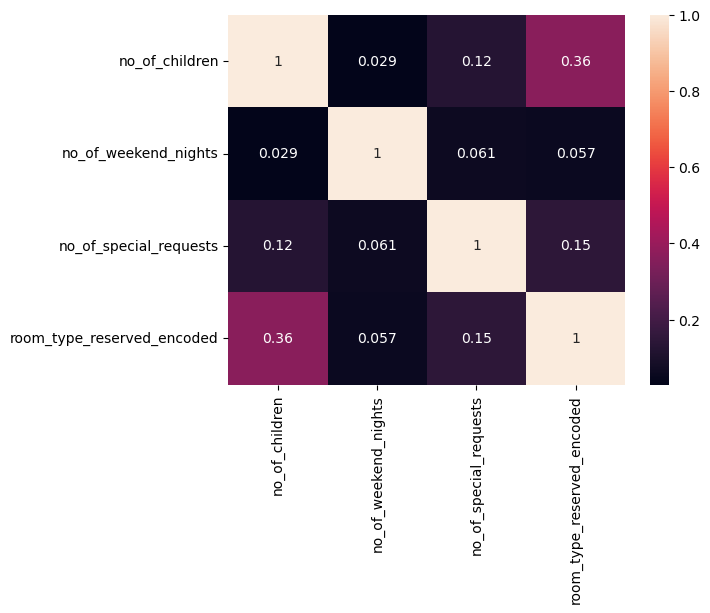

In [39]:
# Study of correlation among features
import seaborn as sns
import matplotlib.pyplot as plt
X1 = pd.DataFrame(
    {
    'no_of_children':hotel_reservations_drop_emptyrow[
         'no_of_children'],
    'no_of_weekend_nights':hotel_reservations_drop_emptyrow[
         'no_of_weekend_nights'],
    'no_of_special_requests':hotel_reservations_drop_emptyrow[
         'no_of_special_requests'],
    'room_type_reserved_encoded':room_type_reserved_encoded,
    })
correlation_mat=X1.corr()
sns.heatmap(correlation_mat,annot=True)
plt.show()

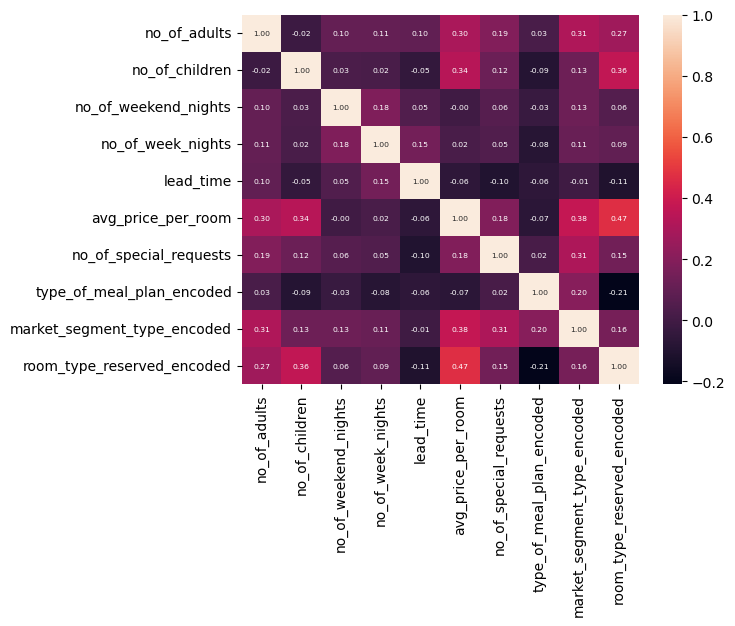

In [40]:
# Study of correlation among features
import seaborn as sns
import matplotlib.pyplot as plt
correlation_mat=X.corr()
sns.heatmap(correlation_mat,
            annot=True, 
            annot_kws={"size":5.5}, 
            fmt='.2f')
plt.show()

## Extra Algorithms I Experimented with when completing project

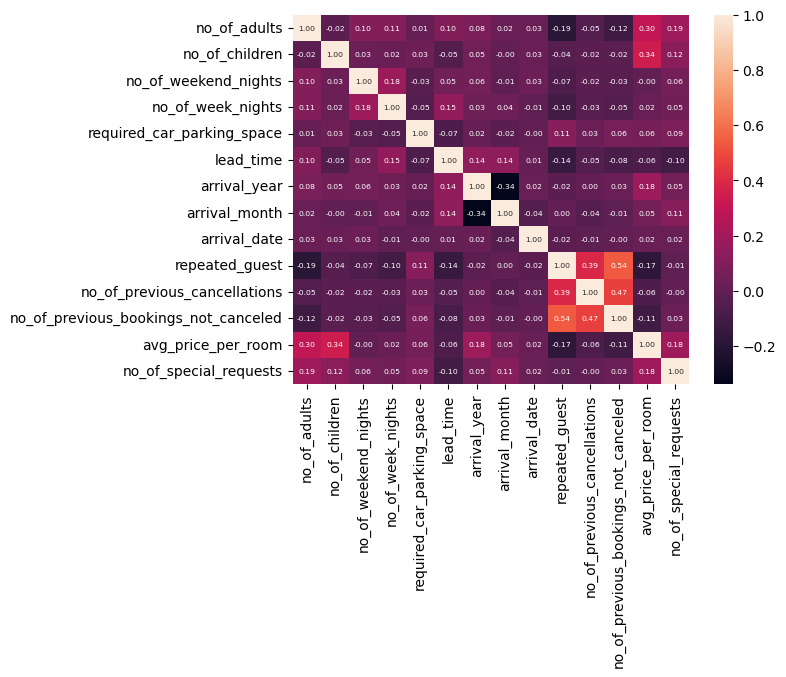

In [41]:
#study of correlation among features
import seaborn as sns
import matplotlib.pyplot as plt
correlation_mat=hotel_reservations.corr()
sns.heatmap(correlation_mat,
            annot=True, 
            annot_kws={
                "size":5.5}, 
            fmt='.2f')
plt.show()

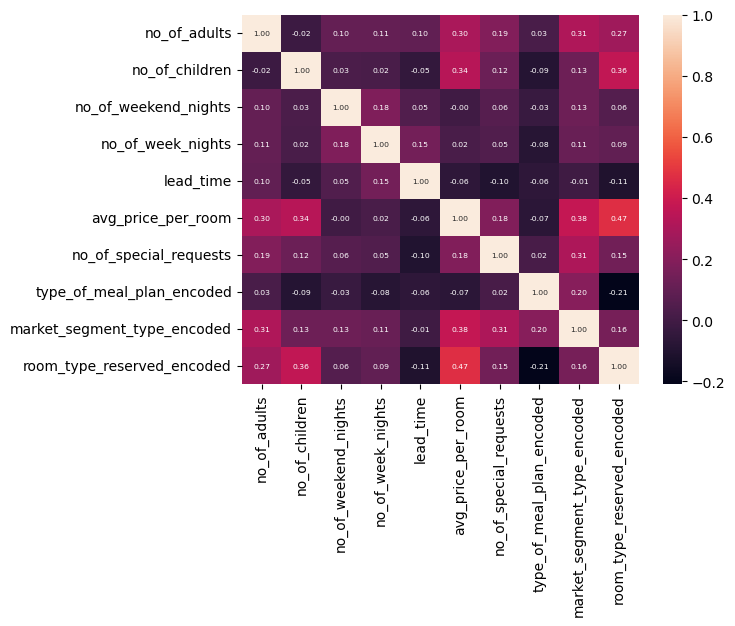

In [42]:
hotel_reservations_subset_x = pd.DataFrame(
    {'no_of_adults':hotel_reservations[
        'no_of_adults'],
    'no_of_children':hotel_reservations[
         'no_of_children'],
    'no_of_weekend_nights':hotel_reservations[
         'no_of_weekend_nights'],
    'no_of_week_nights':hotel_reservations[
         'no_of_week_nights'],
    'lead_time':hotel_reservations[
         'lead_time'],
    'avg_price_per_room':hotel_reservations[
         'avg_price_per_room'],
    'no_of_special_requests':hotel_reservations[
         'no_of_special_requests'],
    'type_of_meal_plan_encoded':type_of_meal_plan_encoded,
    'market_segment_type_encoded':market_segment_type_encoded,
    'room_type_reserved_encoded':room_type_reserved_encoded,
    })
#study of correlation among features
import seaborn as sns
import matplotlib.pyplot as plt
correlation_mat=hotel_reservations_subset_x.corr()
sns.heatmap(correlation_mat,
            annot=True, 
            annot_kws={
                "size":5.5}, 
            fmt='.2f')
plt.show()

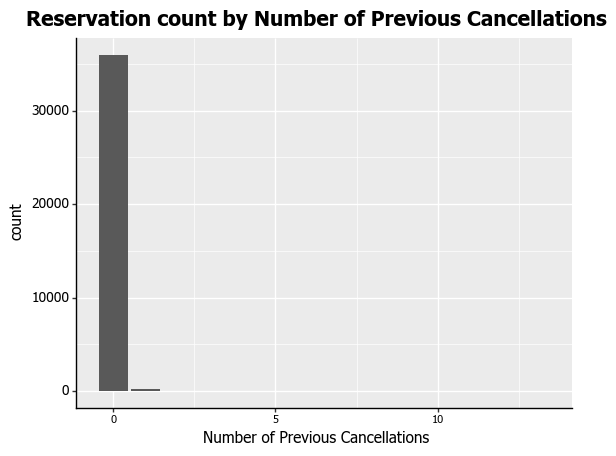

<ggplot: (352453431)>

In [43]:
# Bar plot of the count of number of previous cancellations
from plotnine import *
import pandas as pd
import numpy as np


p01=(ggplot()+geom_bar(hotel_reservations_drop_emptyrow, 
                       aes(x=
                           'no_of_previous_cancellations'), 
                       size=20)
    +xlab("Number of Previous Cancellations")
    +ylab("count")
    
    + ggtitle("Reservation count by Number of Previous Cancellations") 
    + theme( axis_line=element_line(size=1, 
                                       colour="black"), 
               plot_title=element_text(size=15, 
                                       family="Tahoma", 
                                       face="bold"), 
               text=element_text(family="Tahoma", 
                                 size=11), 
               axis_text_x=element_text(colour="black", 
                                        size=8), 
               axis_text_y=element_text(colour="black", 
                                        size=10),
              ))
p01

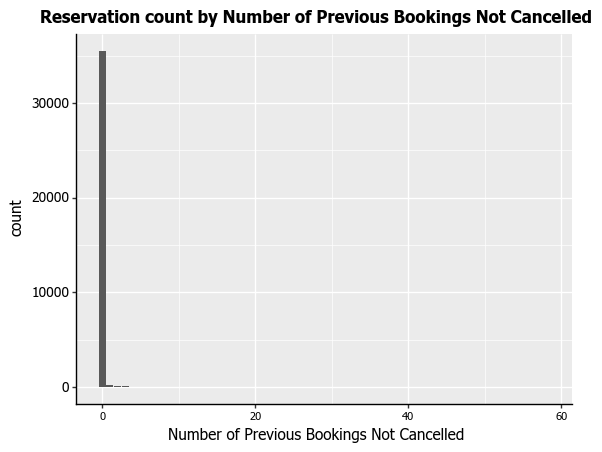

<ggplot: (353401058)>

In [44]:
# Reservation count of number of previous bookings not cancelled
p02=(ggplot()+geom_bar(hotel_reservations_drop_emptyrow, 
                       aes(x='no_of_previous_bookings_not_canceled'), 
                       size=20)
    +xlab("Number of Previous Bookings Not Cancelled")
    +ylab("count")
    +ggtitle("Reservation count by Number of Previous Bookings Not Cancelled") 
    +theme( axis_line=element_line(size=1, 
                                       colour="black"), 
               plot_title=element_text(size=12, 
                                       family="Tahoma", 
                                       face="bold"), 
               text=element_text(family="Tahoma", 
                                 size=11), 
               axis_text_x=element_text(colour="black", 
                                        size=8), 
               axis_text_y=element_text(colour="black", 
                                        size=10),
              ))
p02

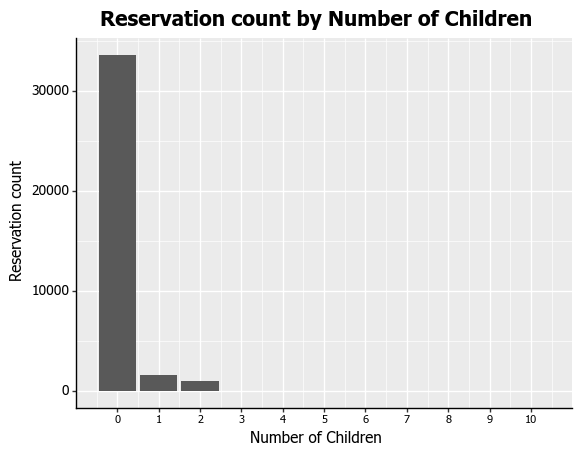

<ggplot: (353437428)>

In [45]:
# Bar plot to show reservation count and number of children
from plotnine import *
import pandas as pd
import numpy as np

p4=(ggplot()+geom_bar(hotel_reservations_drop_emptyrow, 
                      aes(x='no_of_children'), 
                      size=20)
        +xlab("Number of Children")
        +ylab("Reservation count")
    +scale_x_continuous(breaks = np.arange(0, 20, 1))
    + ggtitle("Reservation count by Number of Children") 
    + theme( axis_line=element_line(size=1, 
                                colour="black"), 
               plot_title=element_text(size=15, 
                                    family="Tahoma", 
                                    face="bold"), 
               text=element_text(family="Tahoma", 
                                size=11), 
               axis_text_x=element_text(colour="black", 
                                    size=8), 
               axis_text_y=element_text(colour="black", 
                                    size=10),
              ))
p4

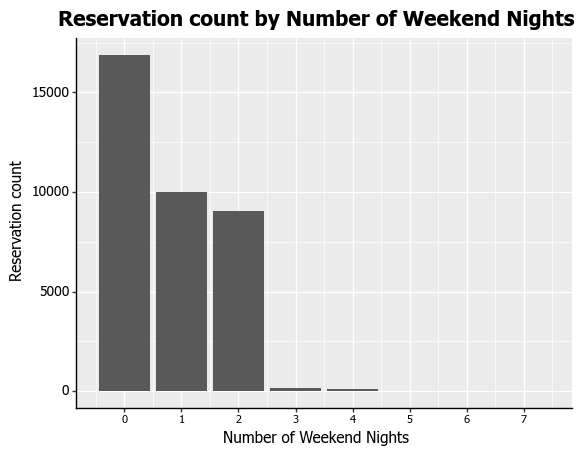

<ggplot: (353685486)>

In [46]:
# Bar plot to show reservation count and number of weekend nights
from plotnine import *
from plotnine.data import mtcars
import pandas as pd
import numpy as np

p5=(ggplot()+geom_bar(hotel_reservations_drop_emptyrow, 
                      aes(x='no_of_weekend_nights'), 
                      size=20)
    +xlab("Number of Weekend Nights")
    +ylab("Reservation count")
    +scale_x_continuous(breaks = np.arange(0, 20, 1))
    +ggtitle("Reservation count by Number of Weekend Nights") 
    +theme(axis_line=element_line(size=1, 
                                colour="black"), 
               plot_title=element_text(size=15, 
                                    family="Tahoma", 
                                    face="bold"), 
               text=element_text(family="Tahoma", 
                                size=11), 
               axis_text_x=element_text(colour=
                                        "black", 
                                        size=8), 
               axis_text_y=element_text(colour=
                                        "black", 
                                        size=10),
              ))
p5

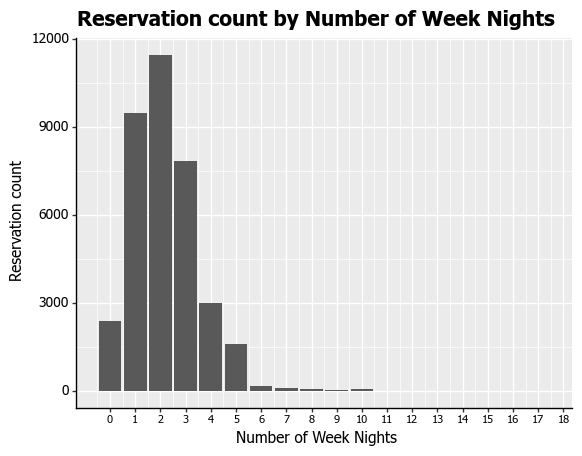

<ggplot: (353657853)>

In [47]:
# Bar plot to show reservation count and number of weekend nights
from plotnine import *
import pandas as pd
import numpy as np

p6=(ggplot()+geom_bar(hotel_reservations_drop_emptyrow, 
                      aes(x='no_of_week_nights'), 
                      size=20)
        +xlab("Number of Week Nights")
        +ylab("Reservation count")
    +scale_x_continuous(breaks = np.arange(0, 20, 1))
    + ggtitle("Reservation count by Number of Week Nights") 
    + theme( axis_line=element_line(size=1, 
                                colour="black"), 
               plot_title=element_text(size=15, 
                                    family="Tahoma", 
                                    face="bold"), 
               text=element_text(family="Tahoma", 
                              size=11), 
               axis_text_x=element_text(colour="black", 
                                    size=8), 
               axis_text_y=element_text(colour="black", 
                                    size=10),
              ))
p6

In [48]:
# Creating dataset for hotel reservations in 2018
from plotnine import *
import pandas as pd
import numpy as np

hotel_reservations_2018 = hotel_reservations_drop_emptyrow[
    hotel_reservations_drop_emptyrow.arrival_year==
    2018]
print(hotel_reservations_2018.head(5))



  Booking_ID  no_of_adults  no_of_children  no_of_weekend_nights  \
1   INN00002             2               0                     2   
2   INN00003             1               0                     2   
3   INN00004             2               0                     0   
4   INN00005             2               0                     1   
5   INN00006             2               0                     0   

   no_of_week_nights type_of_meal_plan  required_car_parking_space  \
1                  3      Not Selected                           0   
2                  1       Meal Plan 1                           0   
3                  2       Meal Plan 1                           0   
4                  1      Not Selected                           0   
5                  2       Meal Plan 2                           0   

  room_type_reserved  lead_time  arrival_year  arrival_month  arrival_date  \
1        Room_Type 1          5          2018             11             6   
2        Room_

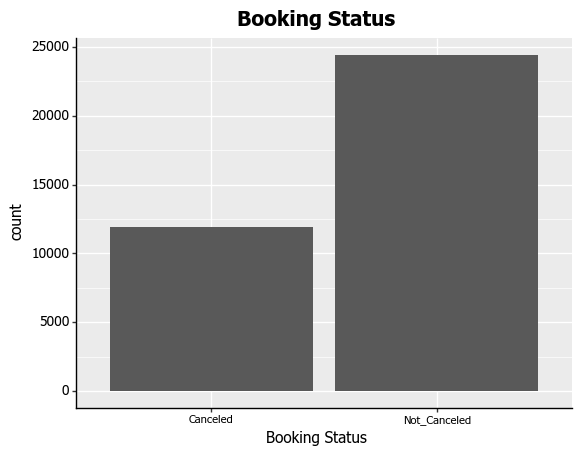

<ggplot: (353871839)>

In [49]:
# bar plot to show count and booking status

from plotnine import *
import pandas as pd
import numpy as np

p8=(ggplot()+geom_bar(hotel_reservations_drop_emptyrow, 
                      aes(x='booking_status'), 
                      size=20)
        +xlab("Booking Status")
        +ylab("count")
       + ggtitle("Booking Status") 
       + theme( axis_line=element_line(size=1, 
                                       colour="black"), 
               plot_title=element_text(size=15, 
                                       family="Tahoma", 
                                       face="bold"), 
               text=element_text(family="Tahoma", 
                                 size=11), 
               axis_text_x=element_text(colour="black", 
                                        size=8), 
               axis_text_y=element_text(colour="black", 
                                        size=10),
              ))
p8

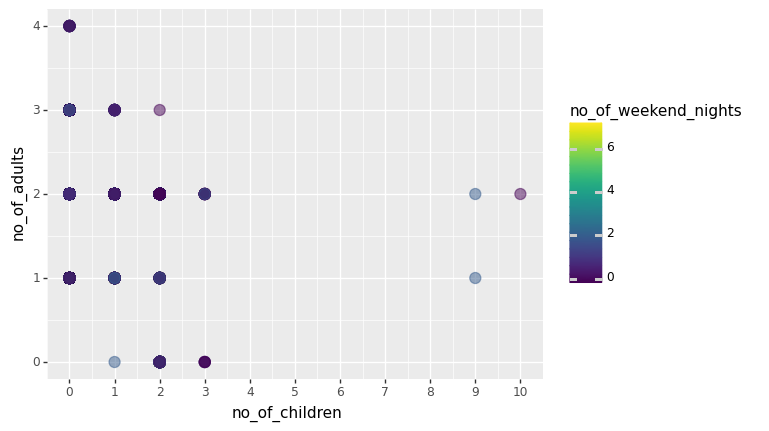

<ggplot: (353899180)>

In [50]:
# Number of children and number of adults on weekend nights
p9=(ggplot(data=hotel_reservations_drop_emptyrow)+geom_point(
    aes(x='no_of_children', 
        y='no_of_adults', 
        color='no_of_weekend_nights'), 
        size=4,alpha=0.5)+ 
        scale_x_continuous(breaks = np.arange(0, 
                                              15, 
                                              1)))
p9

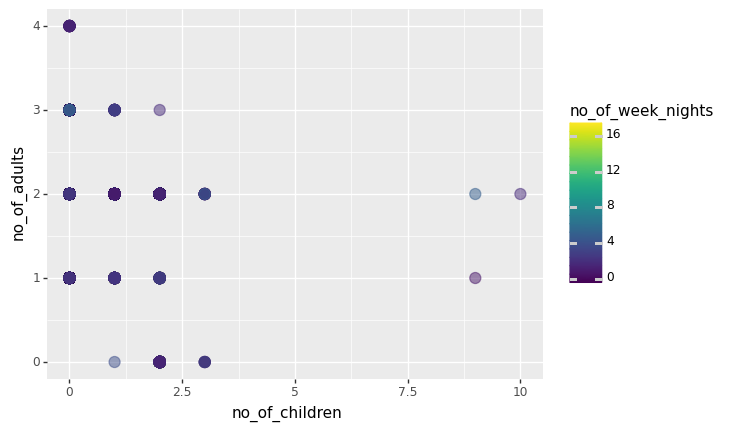

<ggplot: (356071045)>

In [51]:
# Number of children and number of adults on week nights
p10=(ggplot(data=hotel_reservations_drop_emptyrow)+geom_point(
    aes(x='no_of_children', 
        y='no_of_adults', 
        color='no_of_week_nights'),
        size=4,
        alpha=0.5))
p10

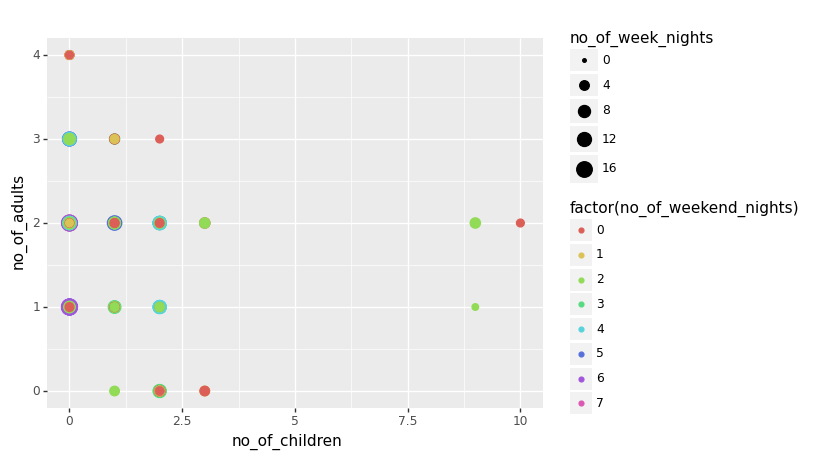

<ggplot: (356793341)>

In [52]:
# Number of children and adults in hotel 
# (size of point is represented by 
# number of week nights and color of point is 
# represented by number of weekend nights)
p11=(ggplot(data=
            hotel_reservations_drop_emptyrow)+geom_point(
    aes(x='no_of_children', 
        y='no_of_adults', 
        size='no_of_week_nights', 
        color='factor(no_of_weekend_nights)')))
p11

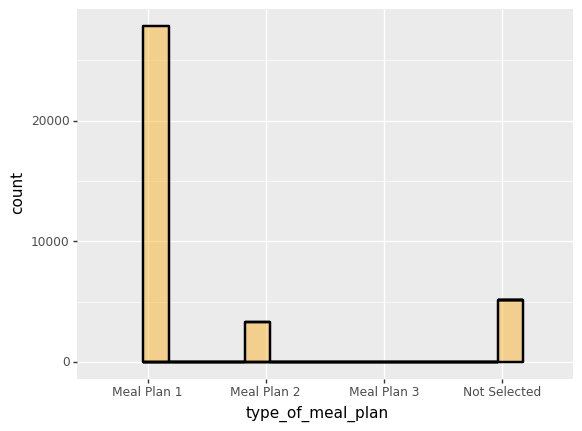

<ggplot: (353935665)>

In [53]:
# Histogram represents the count of the type of meal plan purchased
p12 = (ggplot(hotel_reservations_drop_emptyrow,
    aes(x='type_of_meal_plan'))+geom_histogram(
    alpha=0.4,
    size=1,
    bins=15, 
    color='black',
    fill='orange'))
p12

In [54]:
# seems that most data are for year 2018

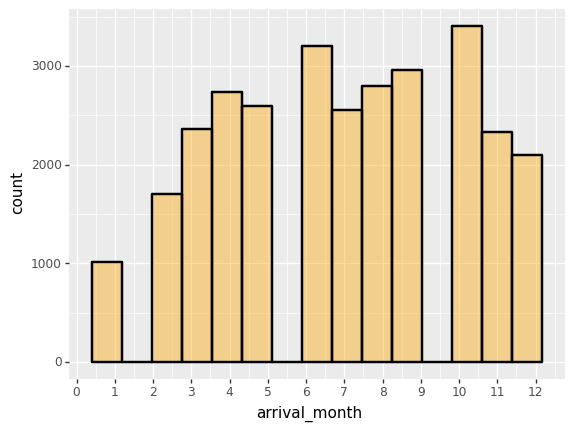

<ggplot: (354002963)>

In [55]:
# Histogram represents the total number of reservations based on arrival 
# month in 2018
p14 = (ggplot(hotel_reservations_2018,
              aes(x=
            'arrival_month'))+geom_histogram(
    alpha=0.4,
    size=1,
    bins=15, 
    color='black',
    fill='orange'))+scale_x_continuous(
    breaks = np.arange(0, 13, 1))
p14

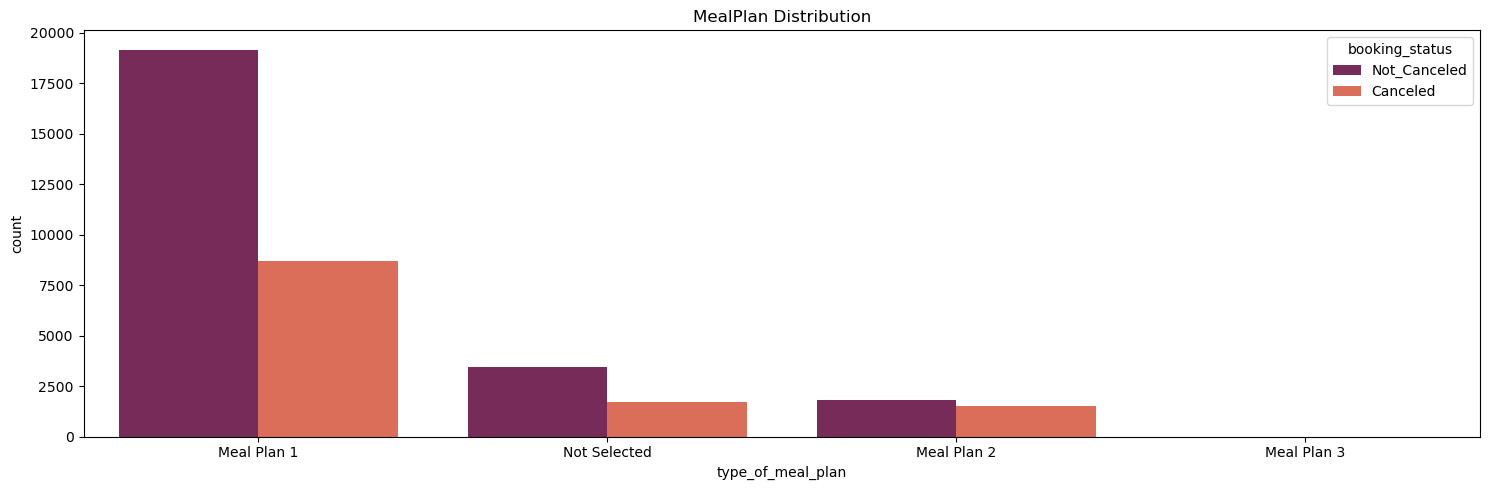

In [56]:
# Distribution of Meal Plan
fig1, ax1 = plt.subplots(figsize=(15, 5))
sns.countplot(x='type_of_meal_plan', 
              hue="booking_status", 
              data=hotel_reservations_drop_emptyrow, 
              palette="rocket")
plt.title(f"MealPlan Distribution")
plt.tight_layout()
plt.show()


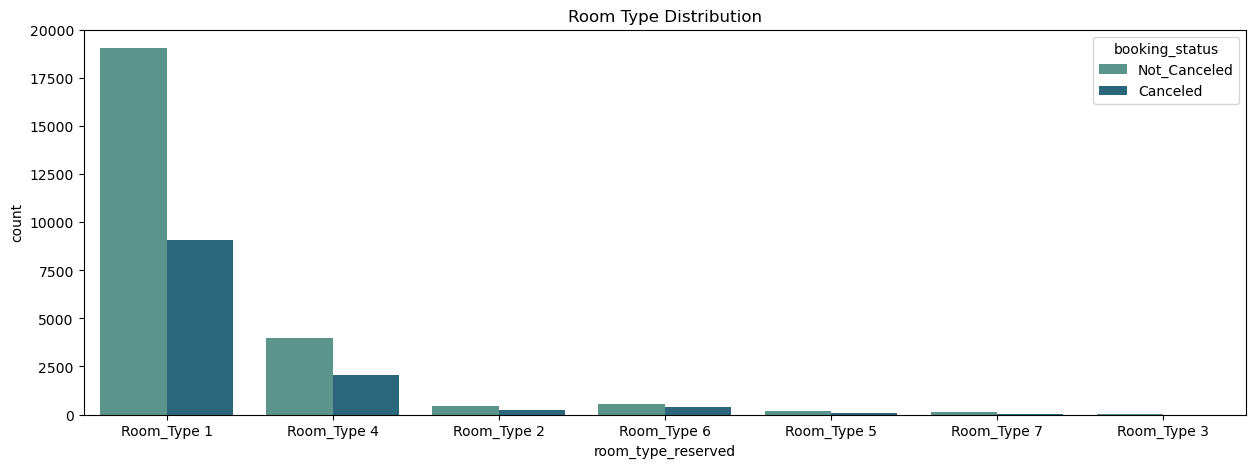

In [57]:
# Distribution of room types
fig2, ax2 = plt.subplots(figsize=(15, 5))
sns.countplot(x='room_type_reserved', 
              hue="booking_status", 
              data=hotel_reservations_drop_emptyrow, 
              palette="crest")
plt.title(f"Room Type Distribution")
plt.show()

    

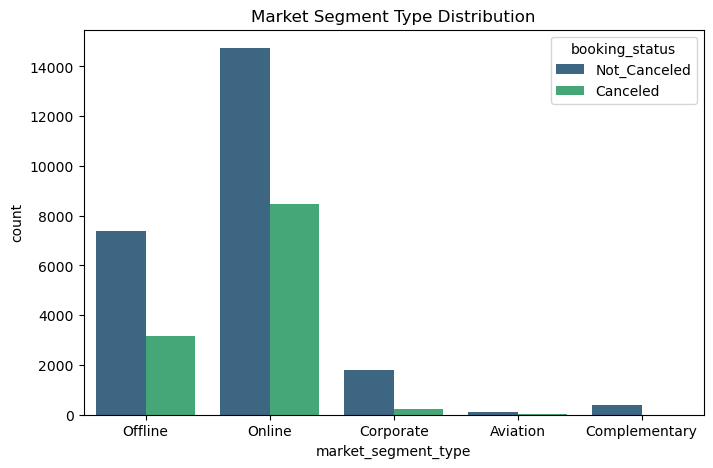

In [58]:
fig3, ax3 = plt.subplots(figsize=(8, 5))
sns.countplot(x='market_segment_type', 
              hue="booking_status", 
              data=hotel_reservations_drop_emptyrow, 
              palette="viridis")
plt.title(f"Market Segment Type Distribution")
plt.show()

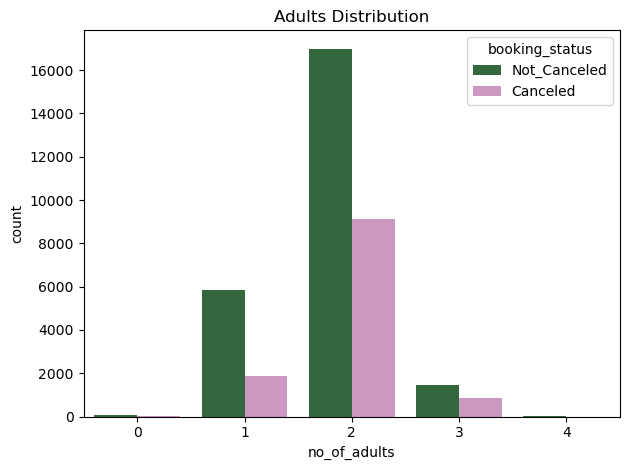

In [59]:
sns.countplot(x='no_of_adults', 
              hue="booking_status", 
              data=hotel_reservations_drop_emptyrow, 
              palette="cubehelix")
plt.title(f"Adults Distribution")
plt.tight_layout()
plt.show()

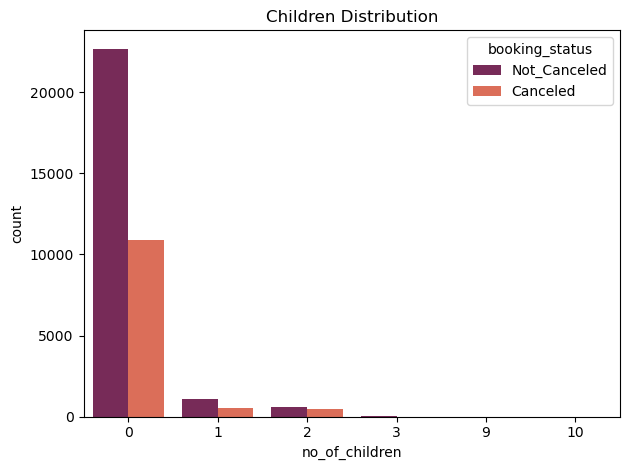

In [60]:
sns.countplot(x='no_of_children', 
              hue="booking_status", 
              data=hotel_reservations_drop_emptyrow, 
              palette="rocket")
plt.title(f"Children Distribution")
plt.tight_layout()
plt.show()

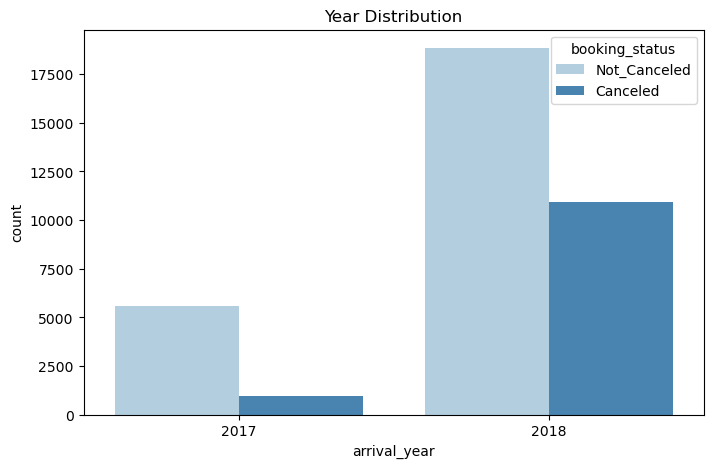

In [61]:
fig4, ax4 = plt.subplots(figsize=(8, 5))
sns.countplot(x='arrival_year', 
              hue="booking_status", 
              data=hotel_reservations_drop_emptyrow, 
              palette="Blues")
plt.title(f"Year Distribution")
plt.show()

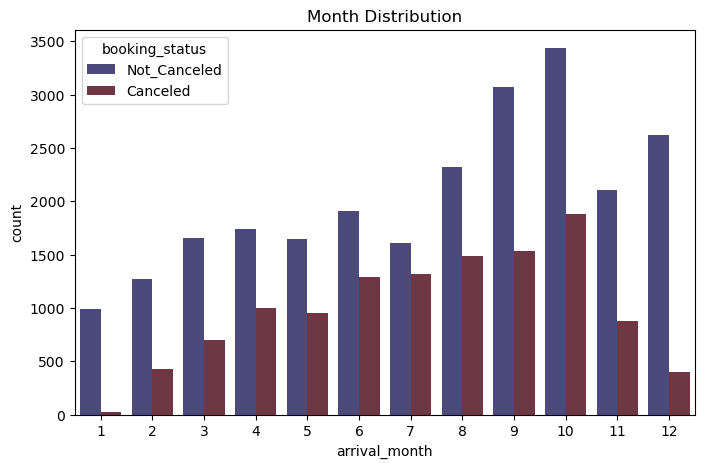

In [62]:
fig5, ax5 = plt.subplots(figsize=(8, 5))
sns.countplot(x='arrival_month', 
              hue="booking_status", 
              data=hotel_reservations_drop_emptyrow, 
              palette="icefire")
plt.title(f"Month Distribution")
plt.show()

<Figure size 1200x1100 with 0 Axes>

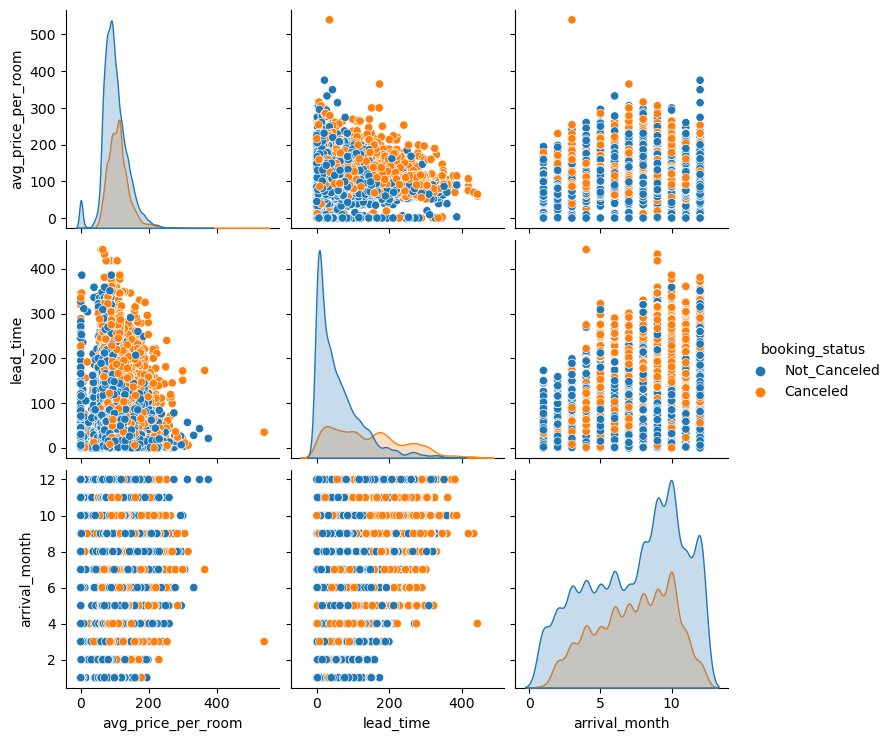

In [63]:
plt.figure(figsize=(12,11))
sns.pairplot(hotel_reservations_drop_emptyrow[[
    'avg_price_per_room', 
    'lead_time', 
    'arrival_month', 
    'booking_status']], 
    hue='booking_status')
plt.show()

/Users/jerryfang/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


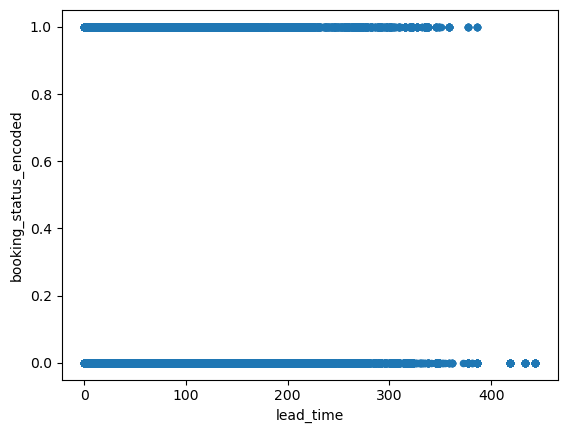

In [64]:
hotel_reservations_leadtime_cancelation = pd.DataFrame({
     'lead_time':hotel_reservations_drop_emptyrow[
         'lead_time'],
     'booking_status_encoded':booking_status_encoded}
     )
hotel_reservations_leadtime_cancelation.plot.scatter(x=
                                            'lead_time', 
                                                     y=
                                    'booking_status_encoded')
plt.show()

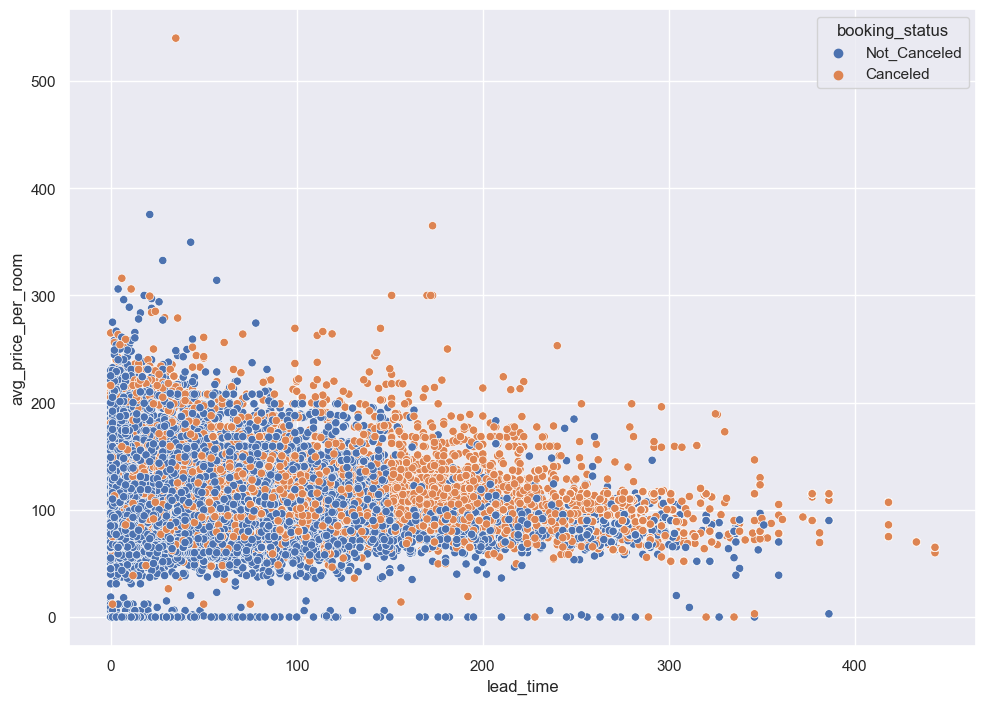

In [65]:

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data = 
                hotel_reservations_drop_emptyrow, 
                x = 'lead_time', 
                y = 'avg_price_per_room', 
                hue  = 'booking_status')
plt.show()

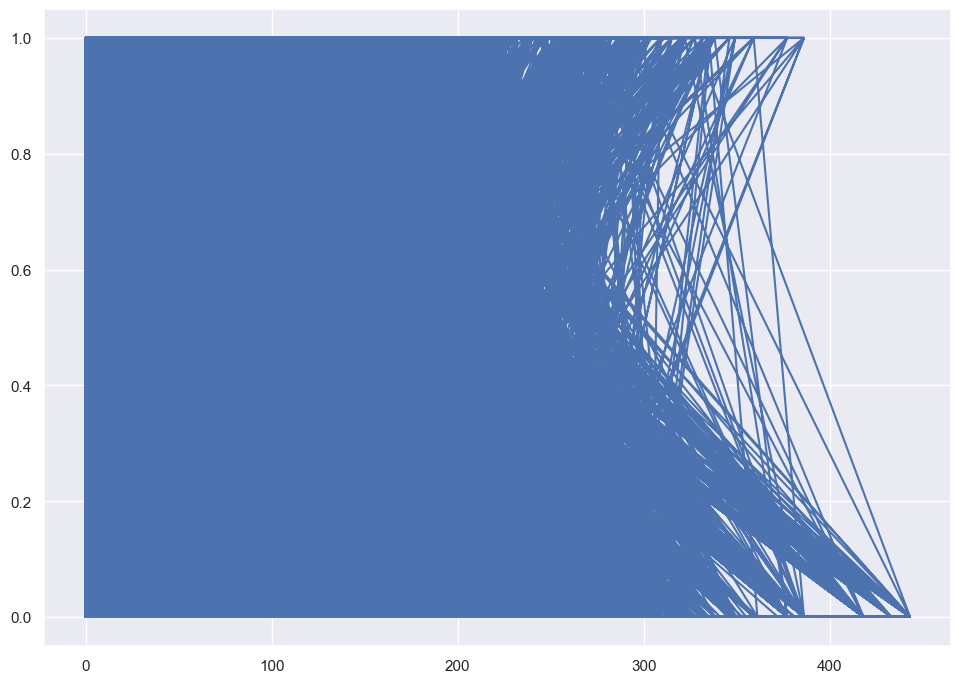

In [66]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
line1, = ax.plot(
    hotel_reservations_leadtime_cancelation[
    'lead_time'], 
    hotel_reservations_leadtime_cancelation[
    'booking_status_encoded'])

plt.show()

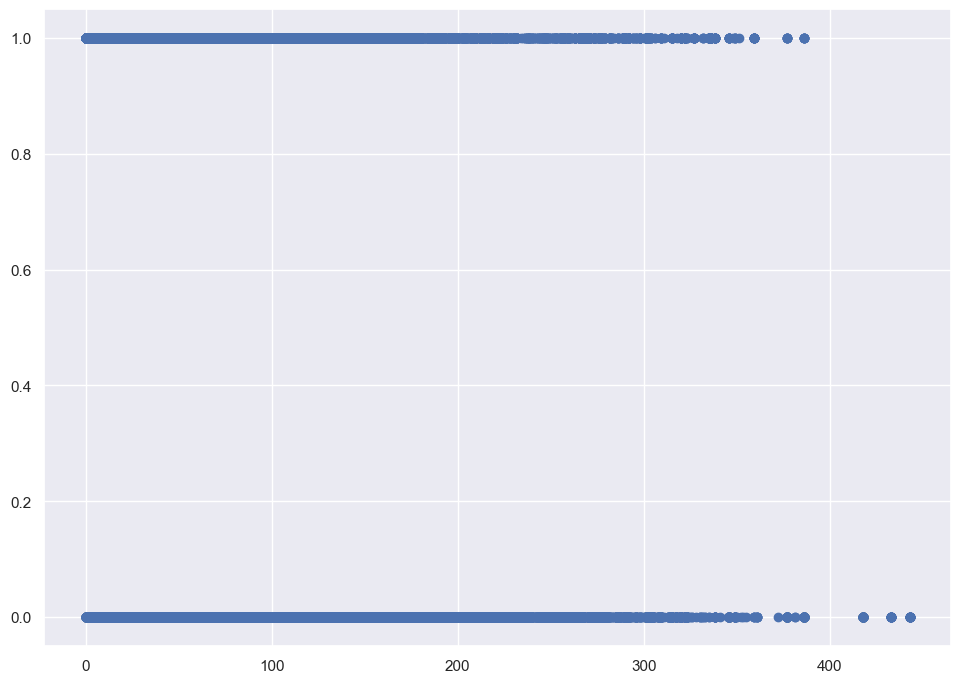

In [67]:
import matplotlib.pyplot as plt

fig, ax=plt.subplots()
ax.scatter(
    hotel_reservations_leadtime_cancelation[
    'lead_time'], 
    hotel_reservations_leadtime_cancelation[
        'booking_status_encoded'])

plt.show()

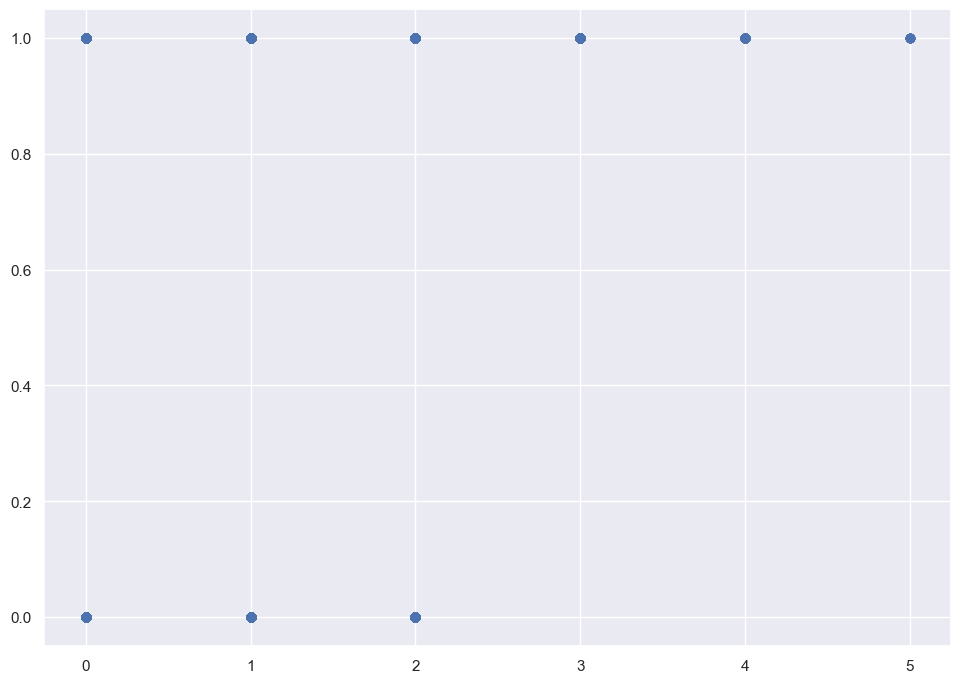

In [68]:
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.scatter(hotel_reservations_drop_emptyrow[
    'no_of_special_requests'], 
    hotel_reservations_leadtime_cancelation[
        'booking_status_encoded'])

plt.show()

/var/folders/05/6v1kbpcx52lgrs6zx4k4zkyc0000gn/T/ipykernel_17738/3128388552.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.


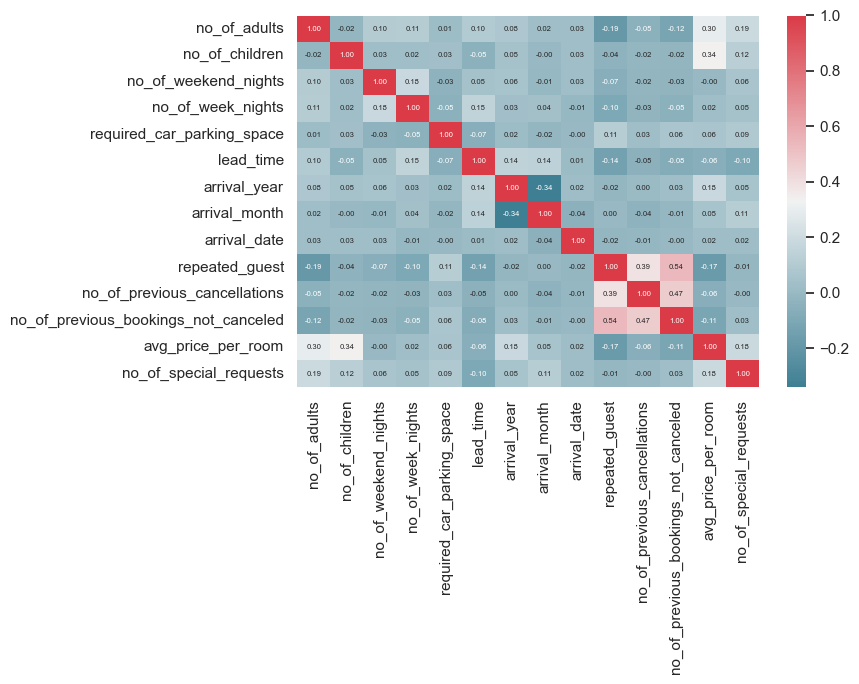

In [69]:
# Correlation matrix

correlation_mat = hotel_reservations_drop_emptyrow.corr()
fig, ax = plt.subplots(figsize = (9, 7))
colormap = sns.diverging_palette(220, 
                            10, 
                            as_cmap=True)
sns.heatmap(correlation_mat, 
            cmap=colormap, 
            annot=True, 
            annot_kws={
                "size":5.5}, 
            fmt='.2f')
fig.tight_layout()
fig.show()


In [70]:
import time
from sklearn.model_selection import train_test_split
hotel_reservations_subset3 = pd.DataFrame(
    {'no_of_adults':hotel_reservations_drop_emptyrow[
    'no_of_adults'],
     'no_of_children':hotel_reservations_drop_emptyrow[
    'no_of_children'],
     'no_of_weekend_nights':hotel_reservations_drop_emptyrow[
    'no_of_weekend_nights'],
     'no_of_week_nights':hotel_reservations_drop_emptyrow[
    'no_of_week_nights'],
     'lead_time':hotel_reservations_drop_emptyrow[
    'lead_time'],
     'avg_price_per_room':hotel_reservations_drop_emptyrow[
    'avg_price_per_room'],
     'no_of_special_requests':hotel_reservations_drop_emptyrow[
    'no_of_special_requests'],
     'type_of_meal_plan_encoded':type_of_meal_plan_encoded,
     'market_segment_type_encoded':market_segment_type_encoded,
     'room_type_reserved_encoded':room_type_reserved_encoded,
    })

X_train, X_test, y_train, y_test = train_test_split(
    hotel_reservations_subset3, 
    booking_status_encoded, 
    test_size=0.3,
    random_state=109)

print(X_train[:5])
print(y_train[:5])
# Naive Bayes with multiple labels
# Model Generation
# Evaluating Model

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB 
t1 = time.time()
#Create a Gaussian Classifier
gnb = GaussianNB() 
#Train the model using the training sets
gnb.fit(X_train, y_train) 
#Predict the response for test dataset
y_pred = gnb.predict(X_test) 
from sklearn import metrics 
# Model. Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, 
                                         y_pred)) 
t2 = time.time()
elapser = t2-t1 
print(elapser, 'seconds')

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
18568             2               0                     2                  1   
34952             1               0                     0                  1   
24519             2               0                     2                  3   
33736             2               0                     2                  3   
18245             2               0                     2                  2   

       lead_time  avg_price_per_room  no_of_special_requests  \
18568        197               82.50                       0   
34952          5              105.00                       0   
24519          4              162.00                       0   
33736         34               94.30                       0   
18245        238               95.63                       2   

       type_of_meal_plan_encoded  market_segment_type_encoded  \
18568                          3                            4   
3495

In [71]:
import time
from sklearn.model_selection import train_test_split
hotel_reservations_subset4 = pd.DataFrame(
    {'no_of_adults':hotel_reservations_drop_emptyrow[
        'no_of_adults'],
     'no_of_children':hotel_reservations_drop_emptyrow[
         'no_of_children'],
     'no_of_weekend_nights':hotel_reservations_drop_emptyrow[
         'no_of_weekend_nights'],
     'no_of_week_nights':hotel_reservations_drop_emptyrow[
         'no_of_week_nights'],
     'no_of_special_requests':hotel_reservations_drop_emptyrow[
         'no_of_special_requests'],
    })

X_train, X_test, y_train, y_test = train_test_split(
    hotel_reservations_subset4, 
    booking_status_encoded, 
    test_size=0.3,
    random_state=109)


print(X_train[:5])
print(y_train[:5])
# Naive Bayes with multiple labels
# Model Generation
# Evaluating Model

#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB 
t1 = time.time()
#Create a Gaussian Classifier
gnb = GaussianNB() 
#Train the model using the training sets
gnb.fit(X_train, y_train) 
#Predict the response for test dataset
y_pred = gnb.predict(X_test) 
from sklearn import metrics 
# Model. Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, 
                                         y_pred)) 
t2 = time.time()
elapser = t2-t1 
print(elapser, 'seconds')

       no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
18568             2               0                     2                  1   
34952             1               0                     0                  1   
24519             2               0                     2                  3   
33736             2               0                     2                  3   
18245             2               0                     2                  2   

       no_of_special_requests  
18568                       0  
34952                       0  
24519                       0  
33736                       0  
18245                       2  
[0 1 1 1 1]
Accuracy: 0.676284112836534
0.004914283752441406 seconds


In [72]:
# Extra Data Processing (miscallaneous)
# Decision Tree Classifier
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

y_pred_decisionTree = decisionTree.predict(X_test)

acc_decisionTree = accuracy_score(y_test, 
                            y_pred_decisionTree)
conf = confusion_matrix(y_test, 
                        y_pred_decisionTree)
clf_report = classification_report(y_test, 
                            y_pred_decisionTree)

print(f"Accuracy Score of Decision Tree is : {acc_decisionTree}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Decision Tree is : 0.7043094734907654
Confusion Matrix : 
[[1064 2518]
 [ 700 6601]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.60      0.30      0.40      3582
           1       0.72      0.90      0.80      7301

    accuracy                           0.70     10883
   macro avg       0.66      0.60      0.60     10883
weighted avg       0.68      0.70      0.67     10883



In [73]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, 
                            y_pred_rd_clf)
conf = confusion_matrix(y_test, 
                        y_pred_rd_clf)
clf_report = classification_report(y_test, 
                                   y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.7040338142056418
Confusion Matrix : 
[[1049 2533]
 [ 688 6613]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.60      0.29      0.39      3582
           1       0.72      0.91      0.80      7301

    accuracy                           0.70     10883
   macro avg       0.66      0.60      0.60     10883
weighted avg       0.68      0.70      0.67     10883



In [74]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, 
                        y_pred_lr)
conf = confusion_matrix(y_test, 
                        y_pred_lr)
clf_report = classification_report(y_test, 
                                   y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.6885050078103464
Confusion Matrix : 
[[ 622 2960]
 [ 430 6871]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.59      0.17      0.27      3582
           1       0.70      0.94      0.80      7301

    accuracy                           0.69     10883
   macro avg       0.65      0.56      0.54     10883
weighted avg       0.66      0.69      0.63     10883



In [75]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, 
                         y_pred_knn)
conf = confusion_matrix(y_test, 
                        y_pred_knn)
clf_report = classification_report(y_test, 
                                   y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.658733805016999
Confusion Matrix : 
[[1930 1652]
 [2062 5239]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.48      0.54      0.51      3582
           1       0.76      0.72      0.74      7301

    accuracy                           0.66     10883
   macro avg       0.62      0.63      0.62     10883
weighted avg       0.67      0.66      0.66     10883



In [76]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

acc_gb = accuracy_score(y_test, 
                        y_pred_gb)
conf = confusion_matrix(y_test, 
                        y_pred_gb)
clf_report = classification_report(y_test, 
                                   y_pred_gb)

print(f"Accuracy Score of Ada Boost Classifier is : {acc_gb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Ada Boost Classifier is : 0.7059634292015069
Confusion Matrix : 
[[ 985 2597]
 [ 603 6698]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.62      0.27      0.38      3582
           1       0.72      0.92      0.81      7301

    accuracy                           0.71     10883
   macro avg       0.67      0.60      0.59     10883
weighted avg       0.69      0.71      0.67     10883

